# importing the libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection  import train_test_split

# 1. reading the datasets

In [25]:
df = pd.read_csv('fuel.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 2. EDA


#  2.1 describing the dataset

In [26]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



# 2.2 histogram : data distribution

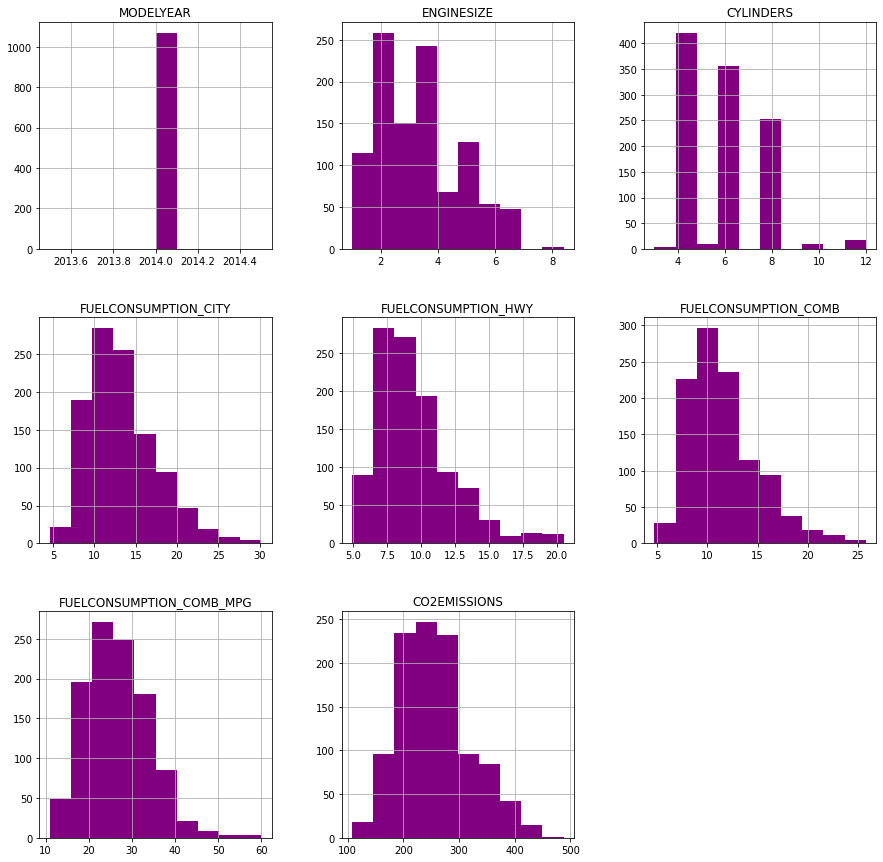

In [27]:
df.hist(figsize = (15,15),color=['purple'])
plt.show()

# 2.3 pairplot

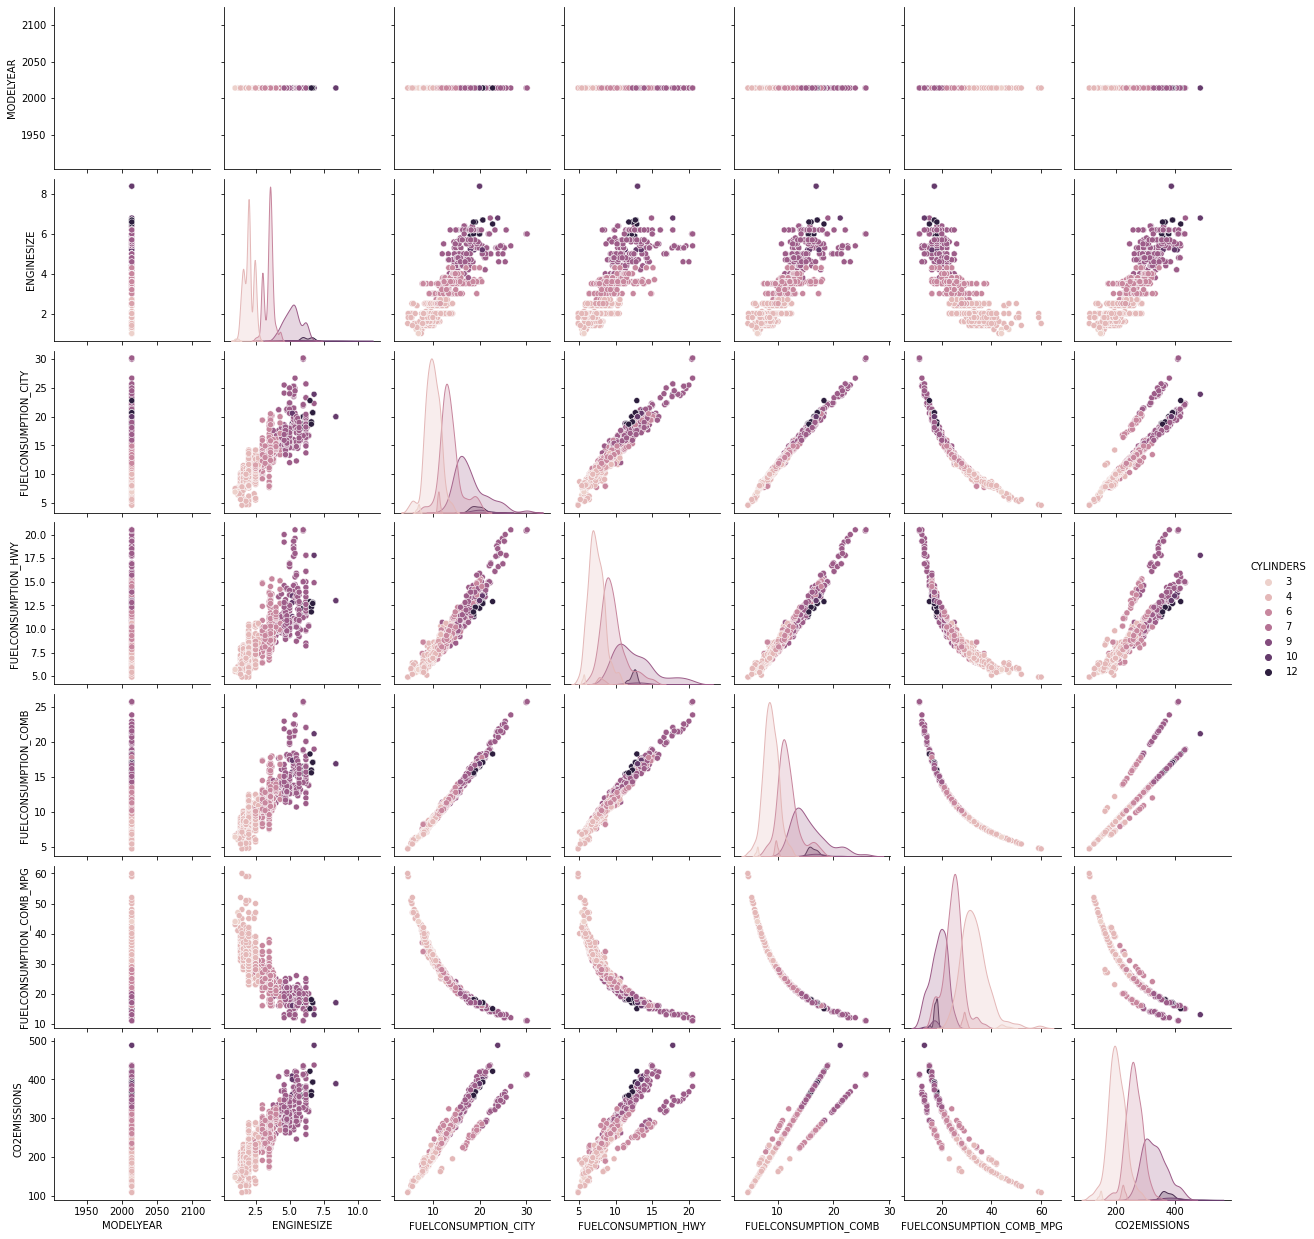

In [28]:
sns.pairplot(data = df,hue='CYLINDERS')
plt.show()

# 2.4 correlation matrix

In [29]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


# 2.5 heatmap

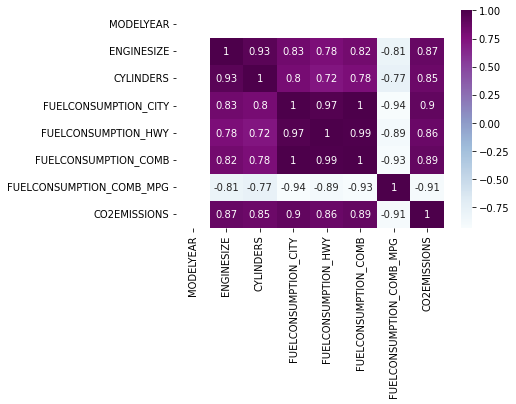

In [30]:
sns.heatmap(df.corr(),annot = True,cmap = 'BuPu')
plt.show()

# 3. preprocessing

# 3.1 Checking null values

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# 3.2 deleting duplicate records/rows

In [32]:
df.duplicated().any()print("x train : ",x_train)

False

# 3.3 (a) feature scaling

In [33]:
d = df.iloc[:,[4,5,8,9,10,11,12]]

In [34]:
normalized = (d - d.min())/(d.max()-d.min())
normalized.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.135135,0.111111,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.189189,0.111111,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.067568,0.111111,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.337838,0.333333,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895


# 3.3 (b) z-score indexing

In [35]:
# we want we perform feature scaling as we donot want a set of features ( features taking larger scale of values ) to dominate the prediction / estimation as compared to  other set of features ( features taking lower scale of values ).
# (x - xmean)/std

In [63]:
zscore = (d - d.mean())/d.std()
zscore.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-0.950846,-0.998500,-0.828169,-0.992876,-0.883890,0.878141,-0.950394
1,-0.668339,-0.998500,-0.511193,-0.635031,-0.568305,0.342573,-0.555900
2,-1.303979,-0.998500,-1.779098,-1.314936,-1.629817,2.886522,-1.897180
3,0.108555,0.114189,-0.145451,-0.134049,-0.137962,-0.192995,-0.019388
4,0.108555,0.114189,-0.291748,-0.277187,-0.281410,0.074789,-0.192966


In [65]:
sc = StandardScaler()
XScaled = sc.fit_transform(zscore)
XScaled

array([[-0.9512918 , -0.99896853, -0.82855772, ..., -0.88430407,
         0.87855306, -0.95084   ],
       [-0.66865251, -0.99896853, -0.5114328 , ..., -0.5685715 ,
         0.34273362, -0.55616091],
       [-1.30459092, -0.99896853, -1.77993246, ..., -1.63058106,
         2.88787597, -1.89806981],
       ...,
       [-0.24469358,  0.11424235,  0.02524013, ...,  0.06289365,
        -0.32704069,  0.23319727],
       [-0.10337393,  0.11424235, -0.09673099, ..., -0.08062116,
        -0.19308583,  0.05953847],
       [-0.10337393,  0.11424235,  0.3911535 , ...,  0.34992326,
        -0.59495041,  0.59630203]])

In [66]:
# take engine size as X column and co2emmision as Y column.
# remove all the attributes as in all the attributes having zero correlation with co2emmision.

# ......................what to do ?

# 1. extract engine size as x column and co2emmision as y column.
# 2. from sklearn.model_selection , import train_test_split module. 
# 3. use train_test_split to partition the dataset into 4 parts x_train x_test y_train y_test.
# 4. create a model (learn parameter w and b) using x_train , y_train.
# 5. use the model to make prediction that is y_pred using x_test
# :- (y pred will be w.x_test + b).
# 6. compute the cost by comparing y_test and y_pred.that is find mean sum of errors.
# cost = (y_test - y_pred)².
# 7. draw the scatter plot between x_train and y_train along with learned model : y = wx + b.

In [67]:
extracted = zscore.iloc[:,[0]]
extracted.head()

,ENGINESIZE
0,-0.950846
1,-0.668339
2,-1.303979
3,0.108555
4,0.108555


In [125]:
x_train,x_test,y_train,y_test = train_test_split(extracted.iloc[:,0].values,df.loc[:,'CO2EMISSIONS'].values,test_size = 0.2,random_state = 101) 
x_train.size,x_test.size,y_train.size,y_test.size

(853, 214, 853, 214)

In [81]:
w = (np.mean(x_train.values * y_train.values) - (np.mean(x_train.values) * np.mean(y_train.values))) / (np.mean(x_train.values ** 2) - (np.mean(x_train.values))** 2)
w

55.838787360656205

In [82]:
b = y_train.mean() - w * x_train.mean()
b

256.4745714452656

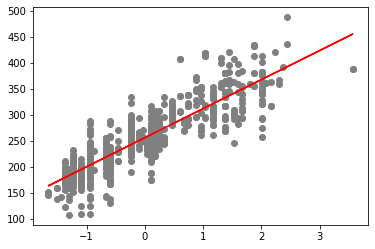

In [84]:
plt.scatter(x_train,y_train,c='grey')
y_pred = ( w * x_train + b )
plt.plot(x_train,y_pred, c =  'red')
plt.show()

# 3.3 (c) normal equation method.

In [167]:
# W = (X^TX)^-1 . X^TY
Y = y_train.reshape(853,1)
X = x_train.reshape(853,1)
onesArray = np.ones(X.shape)
Y.shape,X.shape

((853, 1), (853, 1))

In [168]:
X = np.hstack((onesArray,X))
inverse = np.linalg.inv(X.T.dot(X))

dablu = inverse.dot(X.T.dot(Y))
dablu
# inverse

array([[256.47457145],
       [ 55.83878736]])